In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("telco_customer_churn.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Identifying Categorical Variables among object datatypes
length_of_dataframe=len(df)
result=df.apply(lambda x:x.unique())
l=len(result)

list_index=result.index
i=0

categorical=[]
while i<l:
    if len(result.iloc[i])/length_of_dataframe < 0.01:
        categorical.append(list_index[i])
        print(list_index[i],len(result.iloc[i]))
    i+=1

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


In [5]:
df1=pd.get_dummies(df,columns=categorical,drop_first=True)
df1.info()
custIDs=df1["customerID"]
df1.drop("customerID",axis=1,inplace=True)
def get_boolean_columns(df):
    c=list(df.columns)
    new_c=[]
    for col in c:
        if df[col].dtype=="bool":
            new_c.append(col)

    return new_c
#df1.select_dtypes(include=["bool"]).apply(lambda x: x.astype(int),inplace=True)
bool_columns=get_boolean_columns(df1)
df1.loc[:,bool_columns]=df1[bool_columns].astype(int)
df1["TotalCharges"] = df1["TotalCharges"].replace(" ", np.nan)
df1.dropna(inplace=True)
df1.loc[:,"TotalCharges"]=df1["TotalCharges"].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   object 
 4   gender_Male                            7043 non-null   bool   
 5   SeniorCitizen_1                        7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

C:\Users\shash\AppData\Local\Temp\ipykernel_7888\229191262.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 ... 0 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[:,bool_columns]=df1[bool_columns].astype(int)
C:\Users\shash\AppData\Local\Temp\ipykernel_7888\229191262.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 1 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[:,bool_columns]=df1[bool_columns].astype(int)
C:\Users\shash\AppData\Local\Temp\ipykernel_7888\229191262.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 1 1 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[:,bool_colu

In [6]:

df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.5,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [7]:




model=LogisticRegression(max_iter=1000)
X=df1.drop("Churn_Yes",axis=1)
Y=df1["Churn_Yes"]

#print(X.isnull().sum())
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(mean_squared_error(Y_pred,Y_test))

0.18834399431414356


C:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


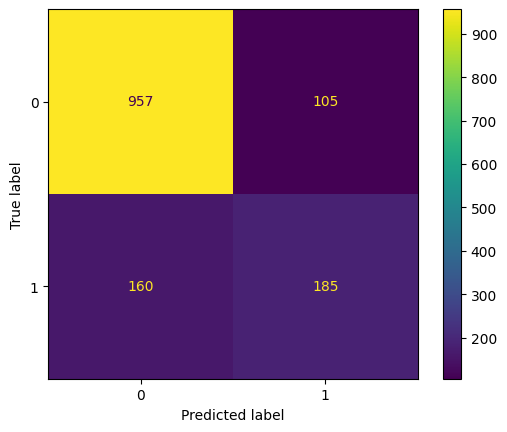

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

In [14]:
tn=957
fp=105

fn=160
tp=185

precision=tp/(fp+tp)
accuracy=(tp+tn)/(tp+tn+fp+fn)
recall_score=tp/(fn+tp)
f1_score=
print(precision,accuracy,recall_score)

0.6379310344827587 0.8116560056858564 0.5362318840579711
